### Big Mart Sales III:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

 

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.



# Import Important Lib:



In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns',600)
sns.set(font_scale=1)

In [6]:
train = pd.read_csv('Train_UWu5bXk.txt')
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [7]:
test = pd.read_csv('Test_u94Q5KV.txt')
test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [8]:
train['type'] = 'Train'
test['type']='Test'

In [11]:
print('Train shape: ', train.shape)
print('Test shape: ', test.shape)

Train shape:  (8523, 13)
Test shape:  (5681, 12)


In [13]:
data = pd.concat([train,test],ignore_index=True)
data.head()

C:\Users\sam\Anaconda5\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,Train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Train


In [14]:
print('data shape: ', data.shape)

data shape:  (14204, 13)


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
type                         14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


In [19]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [15]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
type                            0
dtype: int64

In [17]:
data.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [20]:
data.Outlet_Size = data.Outlet_Size.fillna(data.Outlet_Size.mode()[0])

In [21]:
data.Outlet_Size.unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [26]:
data.Item_Weight = data.Item_Weight.fillna(data.Item_Weight.median())

In [27]:
data.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [31]:
data.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

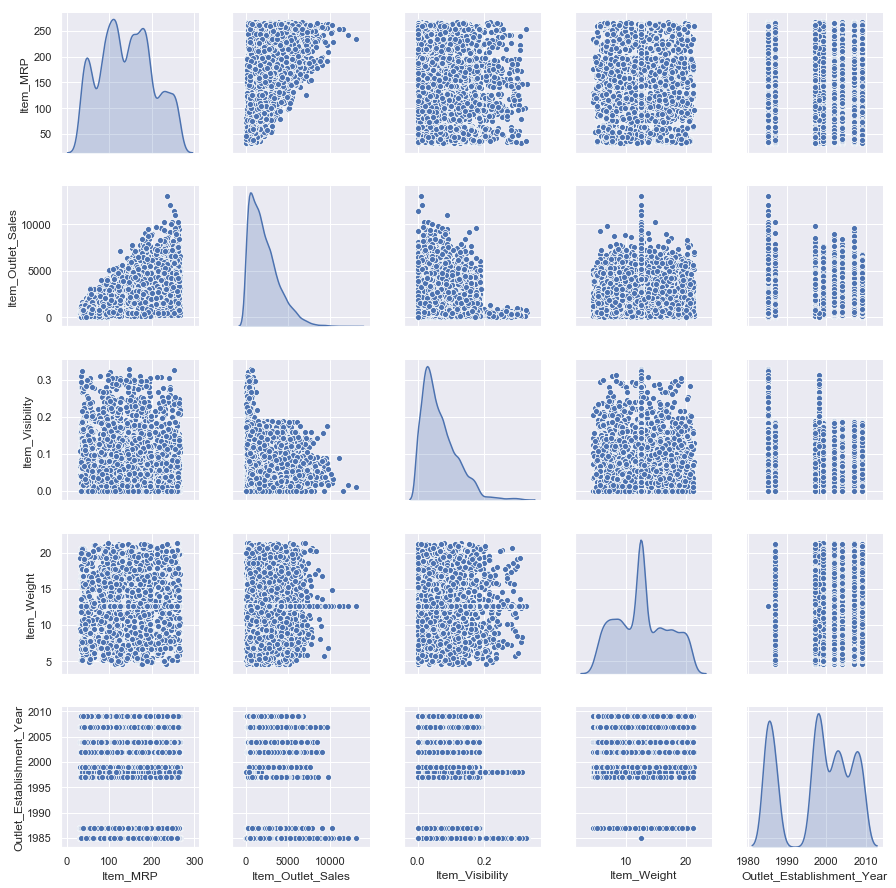

In [30]:
sns.pairplot(data,diag_kind='kde')

In [36]:
data.head(50)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,OUT010,Tier 3,Medium,Grocery Store,Train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.930,1987,OUT013,Tier 3,High,Supermarket Type1,Train
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.000000,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,Tier 3,High,Supermarket Type1,Train
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,12.600,1985,OUT027,Tier 3,Medium,Supermarket Type3,Train
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,Medium,Supermarket Type1,Train
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,Medium,Supermarket Type1,Train


In [37]:
data1 = data.copy()

In [39]:
lst =[]

for i in data1.Item_Identifier:
    if i[0:2]=='FD':
        lst.append('Food')
    elif i[0:2]=='DR':
        lst.append('Drink')
    else:
        lst.append('Household')
data1['Product_type'] = lst

In [41]:
data1.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [42]:
data1.Item_Fat_Content = data1.Item_Fat_Content.replace(['low fat','LF'], 'Low Fat')

In [43]:
data1.Item_Fat_Content = data1.Item_Fat_Content.replace('reg', 'Regular')

In [44]:
data1.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,type,Product_type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,Food
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train,Drink
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,Food
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,Train,Food
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Train,Household


In [51]:
data1[data1.Outlet_Type=='Supermarket Type3']

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,type,Product_type
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,12.6,1985,OUT027,Tier 3,Medium,Supermarket Type3,Train,Food
18,Low Fat,DRI11,113.2834,2303.6680,Hard Drinks,0.034238,12.6,1985,OUT027,Tier 3,Medium,Supermarket Type3,Train,Drink
21,Regular,FDW12,144.5444,4064.0432,Baking Goods,0.035400,12.6,1985,OUT027,Tier 3,Medium,Supermarket Type3,Train,Food
36,Regular,FDV20,128.0678,2797.6916,Fruits and Vegetables,0.059512,12.6,1985,OUT027,Tier 3,Medium,Supermarket Type3,Train,Food
38,Regular,FDX10,36.9874,388.1614,Snack Foods,0.123111,12.6,1985,OUT027,Tier 3,Medium,Supermarket Type3,Train,Food
39,Low Fat,FDB34,87.6198,2180.4950,Snack Foods,0.026481,12.6,1985,OUT027,Tier 3,Medium,Supermarket Type3,Train,Food
62,Low Fat,FDF09,38.2848,484.7024,Fruits and Vegetables,0.012090,12.6,1985,OUT027,Tier 3,Medium,Supermarket Type3,Train,Food
64,Low Fat,FDY45,255.8356,2543.3560,Snack Foods,0.026016,12.6,1985,OUT027,Tier 3,Medium,Supermarket Type3,Train,Food
84,Regular,FDR12,171.3764,3091.9752,Baking Goods,0.031382,12.6,1985,OUT027,Tier 3,Medium,Supermarket Type3,Train,Food
87,Regular,FDQ49,155.9630,3285.7230,Breakfast,0.039058,12.6,1985,OUT027,Tier 3,Medium,Supermarket Type3,Train,Food


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

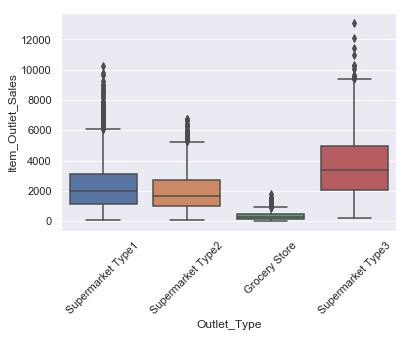

In [56]:
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=data1)
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

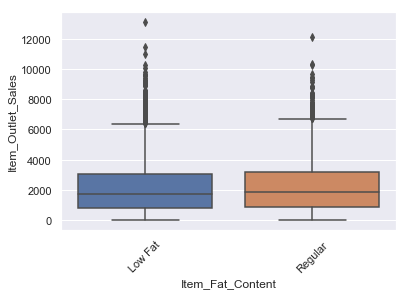

In [58]:
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=data1)
plt.xticks(rotation=45)

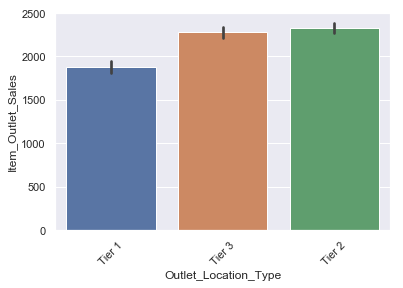

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

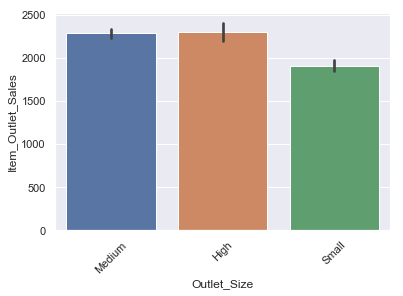

In [70]:
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=data1)
plt.xticks(rotation=45)

plt.show()

sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=data1)
plt.xticks(rotation=45)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

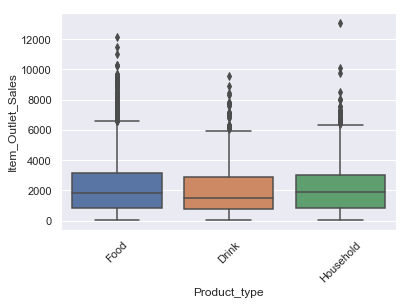

In [59]:


sns.boxplot(x='Product_type',y='Item_Outlet_Sales',data=data1)
plt.xticks(rotation=45)


In [60]:
data1.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

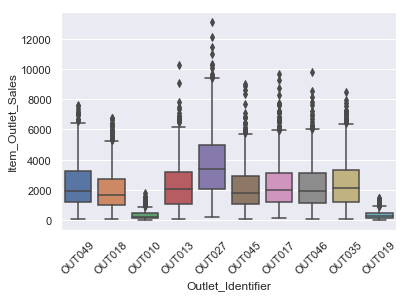

In [61]:
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=data1)
plt.xticks(rotation=45)

In [62]:
data1[data1.Outlet_Identifier=='OUT027']

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,type,Product_type
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,12.6,1985,OUT027,Tier 3,Medium,Supermarket Type3,Train,Food
18,Low Fat,DRI11,113.2834,2303.6680,Hard Drinks,0.034238,12.6,1985,OUT027,Tier 3,Medium,Supermarket Type3,Train,Drink
21,Regular,FDW12,144.5444,4064.0432,Baking Goods,0.035400,12.6,1985,OUT027,Tier 3,Medium,Supermarket Type3,Train,Food
36,Regular,FDV20,128.0678,2797.6916,Fruits and Vegetables,0.059512,12.6,1985,OUT027,Tier 3,Medium,Supermarket Type3,Train,Food
38,Regular,FDX10,36.9874,388.1614,Snack Foods,0.123111,12.6,1985,OUT027,Tier 3,Medium,Supermarket Type3,Train,Food
39,Low Fat,FDB34,87.6198,2180.4950,Snack Foods,0.026481,12.6,1985,OUT027,Tier 3,Medium,Supermarket Type3,Train,Food
62,Low Fat,FDF09,38.2848,484.7024,Fruits and Vegetables,0.012090,12.6,1985,OUT027,Tier 3,Medium,Supermarket Type3,Train,Food
64,Low Fat,FDY45,255.8356,2543.3560,Snack Foods,0.026016,12.6,1985,OUT027,Tier 3,Medium,Supermarket Type3,Train,Food
84,Regular,FDR12,171.3764,3091.9752,Baking Goods,0.031382,12.6,1985,OUT027,Tier 3,Medium,Supermarket Type3,Train,Food
87,Regular,FDQ49,155.9630,3285.7230,Breakfast,0.039058,12.6,1985,OUT027,Tier 3,Medium,Supermarket Type3,Train,Food


In [66]:
data1['Old_store'] = data1['Outlet_Establishment_Year'].apply(lambda x: 1  if x<2000 else 0)

In [67]:
data1.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,type,Product_type,Old_store
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,Food,1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,Train,Drink,0
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,Train,Food,1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,Train,Food,1
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,Train,Household,1


In [71]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 15 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  14204 non-null object
Outlet_Type                  14204 non-null object
type                         14204 non-null object
Product_type                 14204 non-null object
Old_store                    14204 non-null int64
dtypes: float64(4), int64(2), object(9)
memory usage: 1.6+ MB


In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [81]:
data1.Item_Type = le.fit_transform(data1.Item_Type)

In [82]:
data1.Outlet_Identifier = le.fit_transform(data1.Outlet_Identifier)

In [83]:
data1.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,type,Product_type,Old_store
0,Low Fat,156,249.8092,3735.1380,4,0.016047,9.30,1999,9,Tier 1,Medium,Supermarket Type1,Train,Food,1
1,Regular,8,48.2692,443.4228,14,0.019278,5.92,2009,3,Tier 3,Medium,Supermarket Type2,Train,Drink,0
2,Low Fat,662,141.6180,2097.2700,10,0.016760,17.50,1999,9,Tier 1,Medium,Supermarket Type1,Train,Food,1
3,Regular,1121,182.0950,732.3800,6,0.000000,19.20,1998,0,Tier 3,Medium,Grocery Store,Train,Food,1
4,Low Fat,1297,53.8614,994.7052,9,0.000000,8.93,1987,1,Tier 3,High,Supermarket Type1,Train,Household,1


In [80]:
data1.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [116]:
train1 = data1.loc[data1.type=='Train'].reset_index()
test1 = data1.loc[data1.type=='Test'].reset_index()

In [117]:
train1.head(20)

,index,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,type,Product_type,Old_store
0,0,Low Fat,156,249.8092,3735.1380,4,0.016047,9.300,1999,9,Tier 1,Medium,Supermarket Type1,Train,Food,1
1,1,Regular,8,48.2692,443.4228,14,0.019278,5.920,2009,3,Tier 3,Medium,Supermarket Type2,Train,Drink,0
2,2,Low Fat,662,141.6180,2097.2700,10,0.016760,17.500,1999,9,Tier 1,Medium,Supermarket Type1,Train,Food,1
3,3,Regular,1121,182.0950,732.3800,6,0.000000,19.200,1998,0,Tier 3,Medium,Grocery Store,Train,Food,1
4,4,Low Fat,1297,53.8614,994.7052,9,0.000000,8.930,1987,1,Tier 3,High,Supermarket Type1,Train,Household,1
5,5,Regular,758,51.4008,556.6088,0,0.000000,10.395,2009,3,Tier 3,Medium,Supermarket Type2,Train,Food,0
6,6,Regular,696,57.6588,343.5528,13,0.012741,13.650,1987,1,Tier 3,High,Supermarket Type1,Train,Food,1
7,7,Low Fat,738,107.7622,4022.7636,13,0.127470,12.600,1985,5,Tier 3,Medium,Supermarket Type3,Train,Food,1
8,8,Regular,440,96.9726,1076.5986,5,0.016687,16.200,2002,7,Tier 2,Medium,Supermarket Type1,Train,Food,0
9,9,Regular,990,187.8214,4710.5350,5,0.094450,19.200,2007,2,Tier 2,Medium,Supermarket Type1,Train,Food,0


In [118]:
train1['Price_Per_Unit'] = train1.Item_Outlet_Sales/train1.Item_Weight

In [119]:
train1.head()

,index,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,type,Product_type,Old_store,Price_Per_Unit
0,0,Low Fat,156,249.8092,3735.1380,4,0.016047,9.30,1999,9,Tier 1,Medium,Supermarket Type1,Train,Food,1,401.627742
1,1,Regular,8,48.2692,443.4228,14,0.019278,5.92,2009,3,Tier 3,Medium,Supermarket Type2,Train,Drink,0,74.902500
2,2,Low Fat,662,141.6180,2097.2700,10,0.016760,17.50,1999,9,Tier 1,Medium,Supermarket Type1,Train,Food,1,119.844000
3,3,Regular,1121,182.0950,732.3800,6,0.000000,19.20,1998,0,Tier 3,Medium,Grocery Store,Train,Food,1,38.144792
4,4,Low Fat,1297,53.8614,994.7052,9,0.000000,8.93,1987,1,Tier 3,High,Supermarket Type1,Train,Household,1,111.389160


In [120]:
train1 = train1.drop(['index','type','Item_Identifier',],axis=1)

In [121]:
train2  = pd.get_dummies(train1)

In [123]:
train2.head()

,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Old_store,Price_Per_Unit,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Product_type_Drink,Product_type_Food,Product_type_Household
0,249.8092,3735.1380,4,0.016047,9.30,1999,9,1,401.627742,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,48.2692,443.4228,14,0.019278,5.92,2009,3,0,74.902500,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0
2,141.6180,2097.2700,10,0.016760,17.50,1999,9,1,119.844000,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,182.0950,732.3800,6,0.000000,19.20,1998,0,1,38.144792,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0
4,53.8614,994.7052,9,0.000000,8.93,1987,1,1,111.389160,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1


In [124]:
test1.head()

,index,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,type,Product_type,Old_store
0,8523,Low Fat,1114,107.8622,NaN,13,0.007565,20.750,1999,9,Tier 1,Medium,Supermarket Type1,Test,Food,1
1,8524,Regular,1078,87.3198,NaN,4,0.038428,8.300,2007,2,Tier 2,Medium,Supermarket Type1,Test,Food,0
2,8525,Low Fat,1420,241.7538,NaN,11,0.099575,14.600,1998,0,Tier 3,Medium,Grocery Store,Test,Household,1
3,8526,Low Fat,817,155.0340,NaN,13,0.015388,7.315,2007,2,Tier 2,Medium,Supermarket Type1,Test,Food,0
4,8527,Regular,1197,234.2300,NaN,4,0.118599,12.600,1985,5,Tier 3,Medium,Supermarket Type3,Test,Food,1


In [168]:
test2 = test1.drop(['index','type','Item_Identifier','Item_Outlet_Sales',
                    'Outlet_Establishment_Year','Outlet_Identifier'],axis=1)

In [169]:
test3 = pd.get_dummies(test2)
test3.head()

,Item_MRP,Item_Type,Item_Visibility,Item_Weight,Old_store,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Product_type_Drink,Product_type_Food,Product_type_Household
0,107.8622,13,0.007565,20.750,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,87.3198,4,0.038428,8.300,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,241.7538,11,0.099575,14.600,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1
3,155.0340,13,0.015388,7.315,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
4,234.2300,4,0.118599,12.600,1,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0


In [149]:
x = train2.drop(['Item_Outlet_Sales','Item_Visibility','Outlet_Establishment_Year','Outlet_Identifier'],axis=1)

In [150]:
y = train.Item_Outlet_Sales

In [151]:
import statsmodels.api as sm

In [152]:
X = sm.add_constant(x)
model = sm.OLS(y,X).fit()
mod_pred = model.predict(X)
residual = model.resid
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     4774.
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        02:29:28   Log-Likelihood:                -66229.
No. Observations:                8523   AIC:                         1.325e+05
Df Residuals:                    8508   BIC:                         1.326e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          -610.9885     14.840    -41.171      0.000    -640.079    -581.898
Item_MRP                          3.9624      0.125     31.807      0.000       3.718       4.207
Item_Type                         2.9352      1.569      1.871      0.061      -0.140       6.010
Item_Weight                     137.4676      1.719     79.974      0.000     134.098     140.837
Old_store                       -81.2593     12.167     -6.679      0.000    -105.109     -57.410
Price_Per_Unit                    8.5183      0.054    156.409      0.000       8.412       8.625
Item_Fat_Content_Low Fat       -299.6622      9.759    -30.705      0.000    -318.793    -280.532
Item_Fat_Content_Regular       -311.3264     10.879    -28.617      0.000    -332.652    -290.001
Outlet_Location_Type_Tier 1    -154.6191     20.009     -7.727      0.000    -193.842    -115.396
Outlet_Location_Type_Tier 2    -213.5730     14.419    -14.812      0.000    -241.838    -185.308
Outlet_Location_Type_Tier 3    -242.7965     20.255    -11.987      0.000    -282.500    -203.092
Outlet_Size_High               -130.0414     33.630     -3.867      0.000    -195.965     -64.118
Outlet_Size_Medium             -234.5849     11.960    -19.614      0.000    -258.029    -211.140
Outlet_Size_Small              -246.3622     17.889    -13.772      0.000    -281.429    -211.296
Outlet_Type_Grocery Store      -607.5641     17.166    -35.394      0.000    -641.213    -573.915
Outlet_Type_Supermarket Type1  -242.1436     21.619    -11.200      0.000    -284.522    -199.765
Outlet_Type_Supermarket Type2  -316.1563     15.080    -20.965      0.000    -345.717    -286.595
Outlet_Type_Supermarket Type3   554.8755     24.741     22.427      0.000     506.377     603.374
Product_type_Drink             -205.2915     16.370    -12.541      0.000    -237.380    -173.203
Product_type_Food              -182.7671     10.928    -16.725      0.000    -204.188    -161.346
Product_type_Household         -222.9299     13.537    -16.468      0.000    -249.466    -196.394
==============================================================================
Omnibus:                     1037.888   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6973.121
Skew:                          -0.382   Prob(JB):                         0.00
Kurtosis:                       7.365   Cond. No.                     3.41e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.13e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [153]:
from   statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

vif['VIF Factor'] =[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Feature'] = X.columns
vif

C:\Users\sam\Anaconda5\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\sam\Anaconda5\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,Feature
0,0.000000,const
1,1.556977,Item_MRP
2,1.128314,Item_Type
3,1.365920,Item_Weight
4,inf,Old_store
5,2.251217,Price_Per_Unit
6,inf,Item_Fat_Content_Low Fat
7,inf,Item_Fat_Content_Regular
8,inf,Outlet_Location_Type_Tier 1
9,inf,Outlet_Location_Type_Tier 2


In [154]:
from sklearn.model_selection import train_test_split

In [155]:
xtrain, xtest, ytrain,ytest = train_test_split(X,y, test_size = 0.2,random_state=14)

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()

In [157]:
# create object of model
model_new = LinearRegression()

# fit the model with the training data
model_new.fit(xtrain,ytrain)
# predict the target on the new train dataset
predict_train = model_new.predict(xtrain)

# Accuray Score on train dataset
rmse_train = mean_squared_error(ytrain,predict_train)**(0.5)
print('\nRMSE on new train dataset : ', rmse_train)

print('R square is %1.3f' %model_new.score(xtrain, ytrain))

# predict the target on the new test dataset
predict_test = model_new.predict(xtest)

# Accuracy Score on test dataset
rmse_test = mean_squared_error(ytest,predict_test)**(0.5)
print('\nRMSE on new test dataset : ', rmse_test)

print('R square is %1.3f' %model_new.score(xtest, ytest))


RMSE on new train dataset :  578.4118099159033
R square is 0.885

RMSE on new test dataset :  554.8243584340196
R square is 0.895


In [166]:
x.head(2)

,Item_MRP,Item_Type,Item_Weight,Old_store,Price_Per_Unit,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Product_type_Drink,Product_type_Food,Product_type_Household
0,249.8092,4,9.30,1,401.627742,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,48.2692,14,5.92,0,74.902500,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0


In [167]:
test3.head(2)

,Item_MRP,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Old_store,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Product_type_Drink,Product_type_Food,Product_type_Household
0,107.8622,13,0.007565,20.75,1999,9,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,87.3198,4,0.038428,8.30,2007,2,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0


### linear Regression

In [200]:
lr = LinearRegression()
lr.fit(x,y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [201]:
print(x.shape)
print(test3.shape)

(8523, 20)
(5681, 20)


In [202]:
predict_test = lr.predict(test3)

### Linear regression1

In [230]:
x1 =train2.drop(['Item_Outlet_Sales','Price_Per_Unit'],axis=1)

In [231]:
x1.head(1)

,Item_MRP,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Old_store,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Product_type_Drink,Product_type_Food,Product_type_Household
0,249.8092,4,0.016047,9.3,1999,9,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0


In [232]:
test2 = test1.drop(['index','type','Item_Identifier','Item_Outlet_Sales'],axis=1)

In [233]:
test3 = pd.get_dummies(test2)
test3.head(1)

,Item_MRP,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Old_store,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Product_type_Drink,Product_type_Food,Product_type_Household
0,107.8622,13,0.007565,20.75,1999,9,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0


In [234]:
lr = LinearRegression()
lr.fit(x1,y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [235]:
predict_test = lr.predict(test3)

## Using Polynomial Features

In [263]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca=PCA()
sc=StandardScaler()
    
poly=PolynomialFeatures(degree=1)
Xtrain=poly.fit_transform(x1)
Xtest=poly.transform(test3)
scaledXtrain=sc.fit_transform(Xtrain)
scaledXtest=sc.transform(Xtest)

pcascaledXtrain=pca.fit_transform(scaledXtrain)
pcascaledXtest=pca.transform(scaledXtest)



In [ ]:
lr.fit(scaledXtrain,y)

In [240]:
predict_test = lr.predict(scaledXtest)

## Random Forest

In [264]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=200, n_jobs=-1)
rf_reg.fit(pcascaledXtrain,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [265]:
predict_test = rf_reg.predict(pcascaledXtest)

## GradientBoostingRegressor

In [269]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                                    learning_rate=0.01,
                                                    max_depth=4,
                                                    max_features='sqrt',
                                                    min_samples_leaf=15,
                                                    min_samples_split=10,
                                                    loss='huber',
                                                    random_state=42)



In [270]:
gbr.fit(pcascaledXtrain,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='huber', max_depth=4,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=6000,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [275]:
predict_test = gbr.predict(pcascaledXtest)

# XGBOOST

In [280]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [281]:

xgboost = XGBRegressor(learning_rate=0.01,
                                            n_estimators=6000,
                                            max_depth=4,
                                            min_child_weight=0,
                                            gamma=0.6,
                                            subsample=0.7,
                                            colsample_bytree=0.7,
                                            objective='reg:linear',
                                            nthread=-1,
                                            scale_pos_weight=1,
                                            seed=27,
                                            reg_alpha=0.00006,
                                            random_state=42)
xgboost.fit(scaledXtrain,y)

C:\Users\sam\Anaconda5\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\sam\Anaconda5\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[03:53:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.6,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=0, missing=None, n_estimators=6000,
             n_jobs=1, nthread=-1, objective='reg:linear', random_state=42,
             reg_alpha=6e-05, reg_lambda=1, scale_pos_weight=1, seed=27,
             silent=None, subsample=0.7, verbosity=1)

In [282]:
predict_test = xgboost.predict(scaledXtest)

In [283]:
fin = pd.DataFrame()
fin['Item_Identifier'] = test['Item_Identifier']

fin['Outlet_Identifier'] = test['Outlet_Identifier']

fin['Item_Outlet_Sales'] = pd.DataFrame(predict_test)

In [284]:
fin1=fin.iloc[:-2]

In [285]:
export_csv = fin1.to_csv('FinalPred1.csv'
                               ,index=None,header=True)